In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [20]:
directory_path = '../ASIA_CCS_Data/Domain Data/Original data (as is)/PhishLab Ukraine-related-Domains'

domain_frequency_per_day = {}

for filename in os.listdir(directory_path):
    filepath = os.path.join(directory_path, filename)
    # print(filename[16:26])
    if os.path.isfile(filepath):
        with open(filepath, 'r') as file:
            content = file.read()
            # Process the content of the file
            # print(content)
            flag = 'Y).'
            # print(content.index(flag))
            # print(len(content[322+len(flag)+1:].split('\n')))
            domain_frequency_per_day[filename[16:26]] = len(content[322+len(flag)+1:].split('\n'))
    

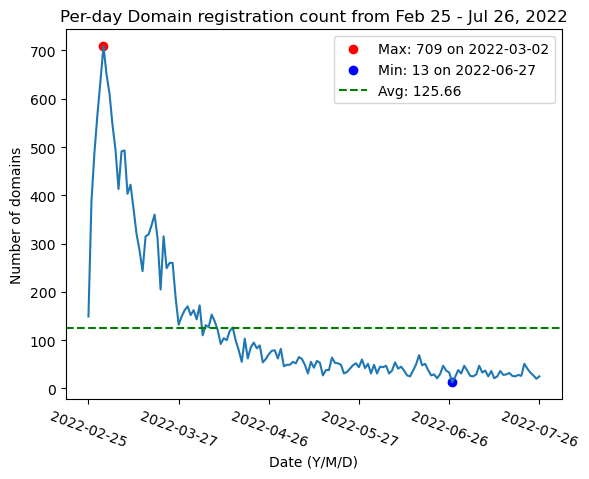

In [29]:
import matplotlib.pyplot as plt

# Data for plotting
dates = list(domain_frequency_per_day.keys())
frequencies = list(domain_frequency_per_day.values())

# Plot the data
plt.plot(dates, frequencies)

# Label the axes
plt.xlabel('Date (Y/M/D)')
plt.ylabel('Number of domains')

# Set x-ticks at intervals of 30
xtick_positions = list(range(0, len(dates), 30))
xtick_labels = [dates[i] for i in xtick_positions]
plt.xticks(xtick_positions, xtick_labels, rotation=-20)

# Highlight the max point
max_value = max(frequencies)
max_idx = frequencies.index(max_value)
plt.scatter(dates[max_idx], max_value, color='red', label=f'Max: {max_value} on {dates[max_idx]}')

# Highlight the min point
min_value = min(frequencies)
min_idx = frequencies.index(min_value)
plt.scatter(dates[min_idx], min_value, color='blue', label=f'Min: {min_value} on {dates[min_idx]}')

# Plot average line
avg = sum(frequencies) / len(frequencies)
plt.axhline(y=avg, color='green', linestyle='--', label=f'Avg: {round(avg, 2)}')

# Title
plt.title('Per-day Domain registration count from Feb 25 - Jul 26, 2022')

# Show legend
plt.legend()

# Show the plot
plt.show()
